# Calculating Potential Customer Return with Rule-Based Classification

**Business Problem**


A gaming company wants to create level-based new customer personas using certain characteristics of their customers and estimate how much potential revenue new customers from these segments could bring to the company on average.

**About Dataset**

The dataset "Persona.csv" contains the prices of products sold by an international gaming company and includes demographic information about the users who purchased these products. The dataset is composed of records generated from each sales transaction. In other words, the table has not been deduplicated. This means that a user with certain demographic characteristics may have made multiple purchases.

- **Price**: Amount of money spent by the customer
- **Source**: Type of device the customer is connected to
- **Sex**: Gender of the customer
- **Country**: Country of the customer
- **Age**: Age of the customer

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None)

## Functions

In [2]:
def count_analyses(df, col, count_name='Sales'):
    """Performs count analyses on a specified column of a DataFrame.

    Args:
        df (DataFrame): The input DataFrame.
        col (str): The name of the column for count analyses.
        count_name (str, optional): The name for the count variable (default: 'Sales').

    Returns:
        None
    """

    # Unique count of the column
    unique_col_count = df[col].nunique()
    print(f"Unique {col} count: {unique_col_count}")

    print()  # Print an empty line for separation

    # Sales counts by the column
    col_counts = df[col].value_counts()
    print(f"{count_name} Counts by {col}:")
    print(col_counts)

def bar_plot_for_counts(df, col, count_name='Sales'):
    """Generates a bar plot for the counts of a specific column in a DataFrame.

    Args:
        df (DataFrame): The input DataFrame.
        col (str): The name of the column for which counts will be plotted.
        count_name (str, optional): The name for the count variable (default: 'Sales').

    Returns:
        None
    """

    # Sales counts by PRICE (sorted by index)
    counts = df[col].value_counts().sort_index()

    # Capitalize the first letter of the column name
    col_name = col[0].upper() + col[1:].lower()

    # Plotting a bar plot with seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, color='skyblue')
    plt.xlabel(col)
    plt.ylabel(f"{count_name} Counts")
    plt.title(f"{count_name} Counts by {col_name} (Bar Plot)")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

## Loading Dataset

In [3]:
# Read the CSV file into a DataFrame
persona_df = pd.read_csv('dataset/persona.csv')

## Exploratory Data Analysis

### Preview of Data

In [4]:
# Display the first few rows of the DataFrame
print("Top rows of the dataset:")
print(persona_df.head())

print()  # Print an empty line for separation

# Display the last few rows of the DataFrame
print("Bottom rows of the dataset:")
print(persona_df.tail())

Top rows of the dataset:
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17

Bottom rows of the dataset:
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31


### Dataset Information

In [5]:
# Get the number of rows and columns in the DataFrame
rows, columns = persona_df.shape

# Print the information about the dataset
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 5000 rows and 5 columns.


In [6]:
# Display the summary information of the DataFrame
print("Dataset Information:")
persona_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


### Summary Statistics

In [7]:
# Display the summary statistics of the DataFrame
print("Summary Statistics:")
print(persona_df.describe().T)

print()  # Print an empty line for separation

# Get the number of unique values in the "PRICE" column
unique_prices = persona_df["PRICE"].nunique()

# Display the number of unique values
print(f"The 'PRICE' column has {unique_prices} unique values.")

Summary Statistics:
        count     mean        std   min   25%   50%   75%   max
PRICE  5000.0  34.1320  12.464897   9.0  29.0  39.0  39.0  59.0
AGE    5000.0  23.5814   8.995908  15.0  17.0  21.0  27.0  66.0

The 'PRICE' column has 6 unique values.


By treating the **PRICE** column as categorical, we can better analyze and interpret the data, as it aligns with the fact that there are only 6 unique values.

In the **AGE** column, the ages range from 15.0 to 66.0, with an average age of 23.5814. The ages appear to be relatively evenly distributed across the range, as indicated by the similar quartiles. The standard deviation of 8.995908 indicates a moderate spread of ages around the mean.

### Comprehensive Data Analysis

#### **SOURCE**

Unique SOURCE count: 2

Sales Counts by SOURCE:
android    2974
ios        2026
Name: SOURCE, dtype: int64



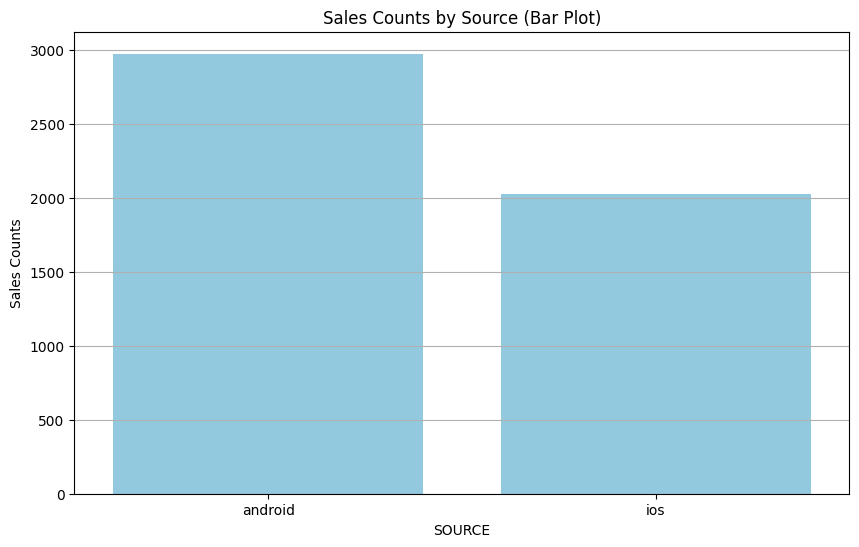

In [8]:
# Perform count analyses on the 'SOURCE' column
# the function created in the function section of the notebook.
count_analyses(persona_df, 'SOURCE')

print()  # Print an empty line for separation

# Generate a bar plot to visualize the sales counts by PRICE
# the function created in the function section of the notebook.
bar_plot_for_counts(persona_df, 'SOURCE')

#### **PRICE**

Unique PRICE count: 6

Sales Counts by PRICE:
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64



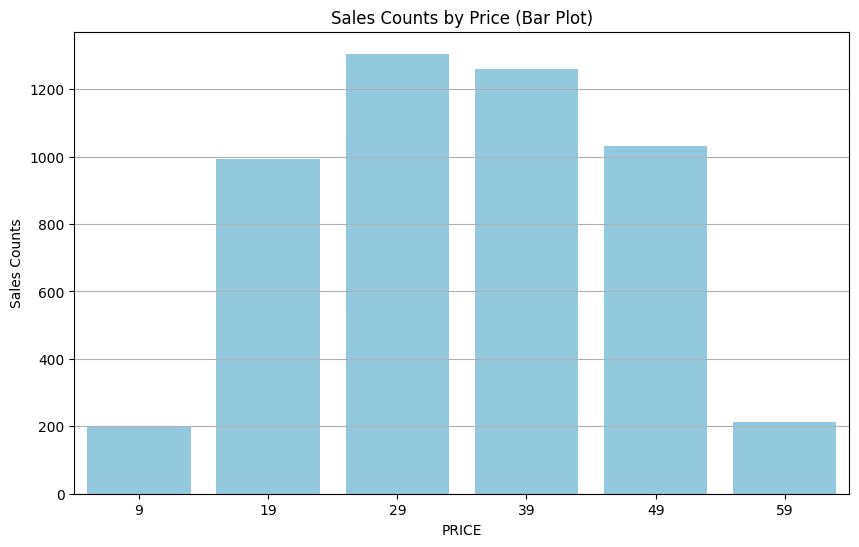

In [9]:
# Perform count analyses on the 'PRICE' column
# the function created in the function section of the notebook.
count_analyses(persona_df, 'PRICE')

print()  # Print an empty line for separation

# Generate a bar plot to visualize the sales counts by PRICE
# the function created in the function section of the notebook.
bar_plot_for_counts(persona_df, 'PRICE')

#### **COUNTRY**

Unique COUNTRY count: 6

Sales Counts by COUNTRY:
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64



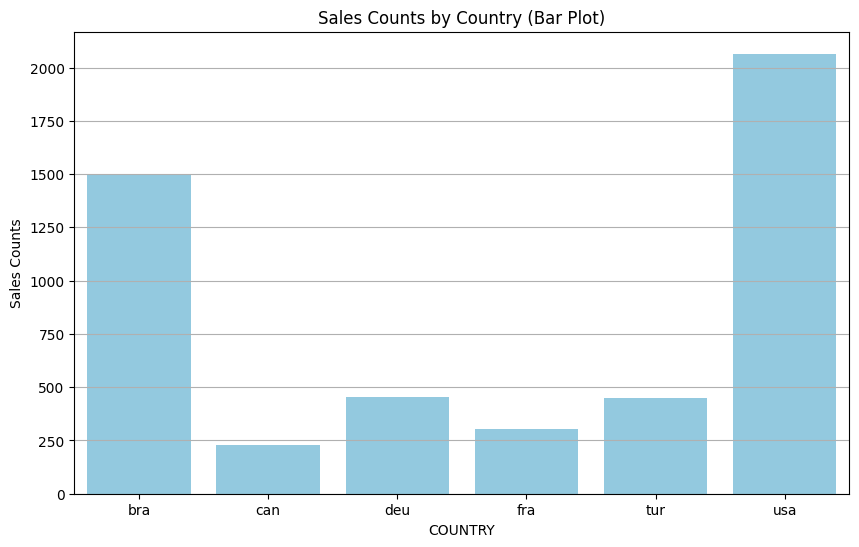

In [10]:
# Perform count analyses on the 'COUNTRY' column
# the function created in the function section of the notebook.
count_analyses(persona_df, 'COUNTRY')

print()  # Print an empty line for separation

# Generate a bar plot to visualize the sales counts by COUNTRY
# the function created in the function section of the notebook.
bar_plot_for_counts(persona_df, 'COUNTRY')

## Case Study Questions & Answers

### How much total revenue was generated from sales by country?

In [11]:
print(persona_df.groupby("COUNTRY").agg({"PRICE": "sum"}).sort_values(by="PRICE", ascending=False))

         PRICE
COUNTRY       
usa      70225
bra      51354
tur      15689
deu      15485
fra      10177
can       7730


### What are the average price values by country?

In [12]:
print(persona_df.groupby("COUNTRY").agg({"PRICE": "mean"}).sort_values(by="PRICE", ascending=False))

             PRICE
COUNTRY           
tur      34.787140
bra      34.327540
deu      34.032967
usa      34.007264
can      33.608696
fra      33.587459


### What are the average price values by source?

In [13]:
print(persona_df.groupby("SOURCE").agg({"PRICE": "mean"}).sort_values(by="PRICE", ascending=False))

             PRICE
SOURCE            
android  34.174849
ios      34.069102


### What are the average price values broken down by country and source?

In [14]:
print(persona_df.groupby(by = ["COUNTRY", "SOURCE"]).agg({"PRICE": "mean"}).sort_values(by="PRICE", ascending=False))

                     PRICE
COUNTRY SOURCE            
tur     android  36.229437
bra     android  34.387029
usa     ios      34.371703
fra     android  34.312500
deu     ios      34.268817
bra     ios      34.222222
can     ios      33.951456
deu     android  33.869888
usa     android  33.760357
can     android  33.330709
tur     ios      33.272727
fra     ios      32.776224


### What are the average earnings broken down by country, source, sex, and age?

In [15]:
# Perform aggregation to calculate the average earnings broken down by COUNTRY, SOURCE, SEX, and AGE
agg_df = persona_df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)

# Display the top records of the aggregated DataFrame
print("Top records of the aggregated DataFrame:")
print(agg_df.head())

# Print an empty line for separation
print()

# Reset the index of the DataFrame to convert indexes into columns
agg_df = agg_df.reset_index()

# Display the top records of the DataFrame with the reset index
print("Top records of the DataFrame with the reset index:")
print(agg_df.head())


Top records of the aggregated DataFrame:
                            PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0

Top records of the DataFrame with the reset index:
  COUNTRY   SOURCE     SEX  AGE  PRICE
0     bra  android    male   46   59.0
1     usa  android    male   36   59.0
2     fra  android  female   24   59.0
3     usa      ios    male   32   54.0
4     deu  android  female   36   49.0


## Customer Segmentation

### Convert the variable 'AGE' into a categorical variable and add it to the 'agg_df'.

In [16]:
# Define the bin boundaries for age categories
bins = [0, 18, 25, 35, 45, 55, agg_df["AGE"].max()]

# Create the labels list based on the bins
age_labels = [f"{bins[i]}_{bins[i+1]-1}" if i < len(bins)-2 else f"{bins[i]}_{'+'}" for i in range(len(bins)-1)]

# Print the labels list
print("Age Labels:")
print(age_labels)

print()

# Create a new column 'age_cat' in agg_df to represent the age categories
agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=age_labels)

# Display the top records of the updated DataFrame
print("Top records of the updated DataFrame:")
print(agg_df.head())


Age Labels:
['0_17', '18_24', '25_34', '35_44', '45_54', '55_+']

Top records of the updated DataFrame:
  COUNTRY   SOURCE     SEX  AGE  PRICE age_cat
0     bra  android    male   46   59.0   45_54
1     usa  android    male   36   59.0   35_44
2     fra  android  female   24   59.0   18_24
3     usa      ios    male   32   54.0   25_34
4     deu  android  female   36   49.0   35_44


### Creating a new level-based customers

In [17]:
# Create a new level-based customers variable by combining selected columns
col_list = ['COUNTRY', 'SOURCE', 'SEX', 'age_cat']
agg_df['customers_level_based'] = agg_df[col_list].apply('_'.join, axis=1).str.upper()

# Display the top records of the updated DataFrame
print("Top records of the updated DataFrame:")
print(agg_df.head())


Top records of the updated DataFrame:
  COUNTRY   SOURCE     SEX  AGE  PRICE age_cat     customers_level_based
0     bra  android    male   46   59.0   45_54    BRA_ANDROID_MALE_45_54
1     usa  android    male   36   59.0   35_44    USA_ANDROID_MALE_35_44
2     fra  android  female   24   59.0   18_24  FRA_ANDROID_FEMALE_18_24
3     usa      ios    male   32   54.0   25_34        USA_IOS_MALE_25_34
4     deu  android  female   36   49.0   35_44  DEU_ANDROID_FEMALE_35_44


### Removing Unnecessary Variables

In [18]:
# Remove unnecessary variables from agg_df
agg_df = agg_df[["customers_level_based", "PRICE"]]

# Display the top records of the updated DataFrame
print("Top records of the updated DataFrame:")
print(agg_df.head())

Top records of the updated DataFrame:
      customers_level_based  PRICE
0    BRA_ANDROID_MALE_45_54   59.0
1    USA_ANDROID_MALE_35_44   59.0
2  FRA_ANDROID_FEMALE_18_24   59.0
3        USA_IOS_MALE_25_34   54.0
4  DEU_ANDROID_FEMALE_35_44   49.0


### Aggregation

In [19]:
# Perform aggregation to calculate the mean price by level-based customers
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})

# Display the aggregated results
print("Aggregated results:")
print(agg_df.head())

Aggregated results:
                              PRICE
customers_level_based              
BRA_ANDROID_FEMALE_0_17   35.645303
BRA_ANDROID_FEMALE_18_24  34.650481
BRA_ANDROID_FEMALE_25_34  32.872314
BRA_ANDROID_FEMALE_35_44  36.873519
BRA_ANDROID_FEMALE_55_+   37.000000


### Segmentation of new Customers by Price

In [20]:
# Segmentation of new customers by price
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])

# Display the top records of the updated DataFrame
print("Top records of the updated DataFrame:")
print(agg_df.head(10))

print()

# Perform aggregation by segment and calculate various statistics
segment_agg = agg_df[["SEGMENT", "PRICE"]].groupby("SEGMENT").agg({'mean', 'min', 'max', 'std', 'sum', 'count'})

# Display the aggregated statistics by segment
print("Aggregated statistics by segment:")
print(segment_agg)


Top records of the updated DataFrame:
                              PRICE SEGMENT
customers_level_based                      
BRA_ANDROID_FEMALE_0_17   35.645303       B
BRA_ANDROID_FEMALE_18_24  34.650481       B
BRA_ANDROID_FEMALE_25_34  32.872314       C
BRA_ANDROID_FEMALE_35_44  36.873519       A
BRA_ANDROID_FEMALE_55_+   37.000000       A
BRA_ANDROID_MALE_0_17     34.805861       B
BRA_ANDROID_MALE_18_24    32.746194       C
BRA_ANDROID_MALE_25_34    32.423382       C
BRA_ANDROID_MALE_35_44    35.912202       B
BRA_ANDROID_MALE_45_54    44.000000       A

Aggregated statistics by segment:
             PRICE                                                   
               max        min       mean       std          sum count
SEGMENT                                                              
D        31.727273  19.000000  28.395529  4.009678   795.074798    28
C        34.140690  31.777778  33.170072  0.705071   895.591936    27
B        36.500000  34.182411  35.303495  0.75287

## Classification and Potential Revenue Prediction for new Incoming Customers

In [21]:
# Classifying a 33-year-old Turkish female using an Android device and predicting their expected revenue segment and average earnings
new_user_1 = 'TUR_ANDROID_FEMALE_25_34'
segment_1 = agg_df[agg_df.index == new_user_1]
print("Classification and expected revenue for the new user:")
print(segment_1)

print()

# Classifying a 35-year-old French female using an iOS device and predicting their expected revenue segment and average earnings
new_user_2 = 'FRA_IOS_FEMALE_35_44'
segment_2 = agg_df[agg_df.index == new_user_2]
print("Classification and expected revenue for the new user:")
print(segment_2)

Classification and expected revenue for the new user:
                              PRICE SEGMENT
customers_level_based                      
TUR_ANDROID_FEMALE_25_34  36.309524       B

Classification and expected revenue for the new user:
                       PRICE SEGMENT
customers_level_based               
FRA_IOS_FEMALE_35_44    33.0       C


**with using function**

In [22]:
def detect_age_label(num, bins=bins, labels=age_labels):
    """Detects the age label based on a numerical value."""
    diff = [num - item for item in bins]
    positive_indexes = [index for index, num in enumerate(diff) if num >= 0]
    max_index = max(positive_indexes)
    age_label = labels[max_index]
    return age_label


def get_user_segment(country, device_type, gender, age):
    """Gets the user segment based on country, device type, gender, and age."""
    age_segment = detect_age_label(age)
    segment_info = [country, device_type, gender, age_segment]
    user_segment = '_'.join([s.upper() for s in segment_info])
    return user_segment


In [23]:
# Classifying a 33-year-old Turkish female using an Android device and predicting their expected revenue segment and average earnings
new_user_1 = get_user_segment('TUR', 'ANDROID', 'FEMALE', 33)
segment_1 = agg_df[agg_df.index == new_user_1]
print("Classification and expected revenue for the new user:")
print(segment_1)

print()

# Classifying a 35-year-old French female using an iOS device and predicting their expected revenue segment and average earnings
new_user_2 =  get_user_segment('FRA', 'IOS', 'FEMALE', 35)
segment_2 = agg_df[agg_df.index == new_user_2]
print("Classification and expected revenue for the new user:")
print(segment_2)

Classification and expected revenue for the new user:
                              PRICE SEGMENT
customers_level_based                      
TUR_ANDROID_FEMALE_25_34  36.309524       B

Classification and expected revenue for the new user:
                       PRICE SEGMENT
customers_level_based               
FRA_IOS_FEMALE_35_44    33.0       C
